# Import Libraries

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import math

# Question 1

In [67]:
def angle_to_time(angle):
    # Normalize the angle to be within the range [0, 360)
    normalized_angle = angle % 360
    
    # Calculate the time based on the angle
    hour = (normalized_angle / 360) * 12
    
    # Round the hour to the nearest integer
    rounded_hour = round(hour)
    
    # Convert 0 to 12 (midnight)
    if rounded_hour == 0:
        return 12
    else:
        return rounded_hour
    
def angle_to_minutes(angle):
    # Normalize the angle to be within the range [0, 360)
    normalized_angle = angle % 360

    # Calculate the minutes based on the angle
    minutes = (normalized_angle / 360) * 60

    # Round the minutes to the nearest integer
    rounded_minutes = round(minutes)

    return rounded_minutes

In [80]:
# Function to print the time on a clock
def GetTime(image):
    

    # Convert to grayscale for simplicity
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply The Gaussian blur to reduce noise
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Canny edge detection is performed on the grayscale image to highlight the edges of objects 
    edges = cv2.Canny(gray, 100, 200)

    # Use Hough Probabilistic Line Transform to detect lines
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=110, minLineLength=40, maxLineGap=10)
    
    # Remove the repeating lines
    needed_lines = []
    gradients = []
    lengths = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        
        # If a line is vertical with infinity gradient, we will have problem of diving with zero
        if x2-x1 == 0:
            gradient = float('inf')
        
        else:
            gradient = (y2-y1)/(x2-x1)

        if gradient not in gradients:
            # Add the gradient of the line to the list
            gradients.append(gradient)
            needed_lines.append(line[0])
            length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
            lengths.append(length)
            
    line_data = []

    # Determine which line is the "hour hand" and which is the "minute hand"
    if lengths[0] < lengths[1]:
        hour_hand_index, minute_hand_index = 0, 1
    else:
        hour_hand_index, minute_hand_index = 1, 0

    for i in range(len(needed_lines)):
        line = {
            'name': 'hour hand' if i == hour_hand_index else 'minute hand',
            'x1': needed_lines[i][0],
            'y1': needed_lines[i][1],
            'x2': needed_lines[i][2],
            'y2': needed_lines[i][3],
            'gradient': gradients[i],
            'length': lengths[i],
            'angle': 0  # Initialize angle to 0
        }
        line_data.append(line)

    for i in line_data:

        angle_radians = math.atan(i['gradient'])

        # Convert the angle to degrees
        angle_degrees = angle_radians * (180 / math.pi)

        # Ensure the angle is in the clockwise direction
        i['angle'] = 360 - angle_degrees - 270

    print(line_data)

    hour = 0
    min = 0

    for i in line_data:
        if i['name'] == 'minute hand':
            min = angle_to_minutes(i['angle'])
        else:
            hour = angle_to_time(i['angle'])
    print("Time is ", hour, ":",min)

    # # Calculate the angles of the lines
    # angle_shorthand = 0
    # for line in needed_lines:
    #     x1, y1, x2, y2 = line
    
    #     # Calculate the length of the line
    #     length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

    #     # # Calculate the angle of the line with respect to the x-axis
    #     angle_radians = np.arctan2(y2 - y1, x2 - x1)
    #     angle_degrees = np.degrees(angle_radians)

    #     angles.append(angle_degrees)
    #     # Add the angle to the list of angles
    #     print("Angles : ",angles)
        

    #     # Draw the line on the image
    #     cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    for i in line_data:
        cv2.line(image, (i['x1'],i['y1']),(i['x2'],i['y2']),(0,255,0),2)

     # Write the labels on the images
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    font_thickness = 2
    font_color = (0, 255, 0)  # Green color
    y_position = 35  # Adjust the y-position as needed

    cv2.putText(image, str(hour) + ':' + str(min), (10, y_position), font, font_scale, font_color, font_thickness, cv2.LINE_AA)
    plt.imshow(image)
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()  # Display the image in a window
    # #plt.imshow(image, cmap='gray') 
    # plt.axis('off')  # Turn off axis labels and ticks
    # plt.show()  # Display the image in a window
    
    # histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
    # plt.subplot(1, 2, 2)
    # plt.title('Histogram')
    # plt.xlabel('Pixel Value')
    # plt.ylabel('Frequency')
    # plt.plot(histogram)
    # plt.xlim([0, 256])


[{'name': 'minute hand', 'x1': 236, 'y1': 226, 'x2': 345, 'y2': 226, 'gradient': 0.0, 'length': 109.0, 'angle': 90.0}, {'name': 'hour hand', 'x1': 227, 'y1': 212, 'x2': 227, 'y2': 144, 'gradient': inf, 'length': 68.0, 'angle': 0.0}]
Time is  12 : 15


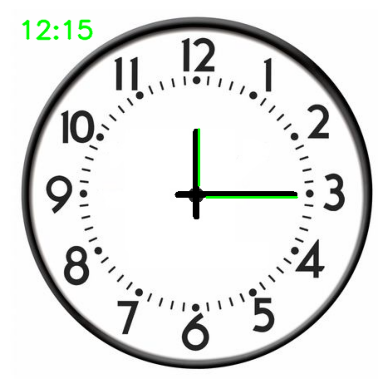

In [81]:
image = cv2.imread('Data/2-1.jpg')

if image is None:
    print("Error: Image not found or cannot be loaded.")
else:
    # Convert the image to grayscale
    GetTime(image)


In [50]:
# short hand
rad = math.atan(float('inf'))

print(rad)

# Convert the angle to degrees
angle_degrees = rad * (180 / math.pi)

# Ensure the angle is in the clockwise direction
360 - angle_degrees - 270

1.5707963267948966


0.0

# Question 2

In [168]:
# Function to check if a character is same as in the below list of characters
def GetMatch(image):

    upper_box = {
                    'x': 319,
                    'y': 50,
                    'width': 150,
                    'height': 125
                                    }

    lower_box = {
                    'x': 18,
                    'y': 232,
                    'width': image.shape[1],
                    'height': image.shape[0] - 232
                                    }       

    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Extract the upper region
    upper_region = image[upper_box['y']:upper_box['y'] + upper_box['height'], upper_box['x']:upper_box['x'] + upper_box['width']]

    # Display the upper region
    plt.imshow(upper_region,cmap='gray')
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()  # Display the image in a window
   
    # Extract the lower region
    lower_region = image[lower_box['y']:lower_box['y'] + lower_box['height'],lower_box['x']:lower_box['x'] + lower_box['width']]

    plt.imshow(lower_region,cmap='gray')
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()  # Display the image in a window

    # Find matches
    matches = np.where(cv2.matchTemplate(lower_region, upper_region, cv2.TM_CCOEFF_NORMED) >= 0.95)
    matches = list(zip(*matches[::-1]))  # Reverse the coordinates

    if len(matches) != 0:

        # Convert the image back to color
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

        # Draw bonding box
        for m in matches:
            top_left = (m[0] + lower_box['x'], m[1] + lower_box['y'])
            h, w = upper_region.shape
            bottom_right = (top_left[0] + w, top_left[1] + h)
            cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

    else:
        print("Character was not found")
        
    # Display the image wit the green bounding box
    plt.imshow(image,cmap='gray')
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()  # Display the image in a window

        

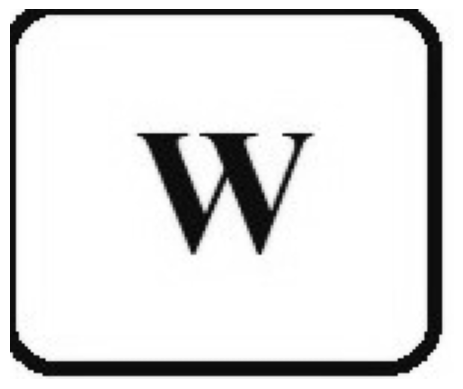

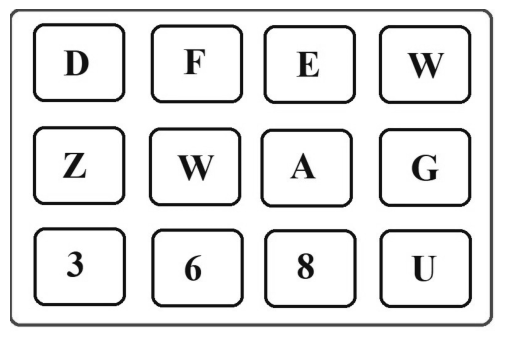

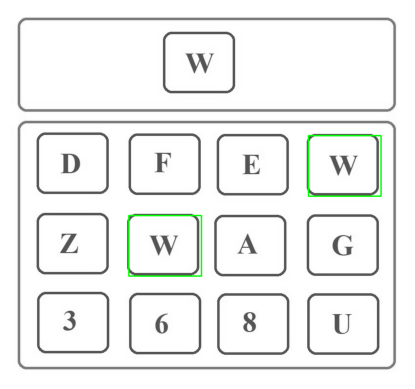

In [172]:
image = cv2.imread('Data/1-4.jpg')

if image is None:
    print("Error: Image not found or cannot be loaded.")
else:
    GetMatch(image)
